In [5]:
# Initialize Otter
import otter


grader = otter.Notebook("08-exercise-pids2024.ipynb")

# Exercise sheet 8
**Hello everyone!**

**Points: 15**

Topics of this exercise sheet are:
* Central Limit Theorem
* Confidence Interval


Please let us know if you have questions or problems! <br>
Contact us during the exercise session or on [Piazza](https://piazza.com/unibas.ch/spring2024/63982).

**Automatic Feedback**

This notebook can be automatically graded using Otter grader. To find how many points you get, simply run `grader.check_all()` from a new cell. 


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


print(pd.__version__)
print(type(plt))

2.0.3
<class 'module'>


# 1 (8 points)

We define a random variable $X_\text{mean}$ as follows:
$$
X_\text{mean} = \dfrac{1}{N} \sum_{i=1}^N X_i 
$$
Where $X_i \sim$ Binomial($n,p$). As discussed in the last lecture, we can analytically compute the mean and variance of this random variable:
$$
\mathbb{E}[X_\text{mean}] = \dfrac{1}{N} \sum_{i=1}^N \mathbb{E}[X_i] = np
$$
$$
\text{Var}[X_\text{mean}] = \dfrac{1}{N^2} \sum_{i=1}^N \text{Var}[X_i] = \dfrac{np(1-p)}{N}
$$
In this exercise, we want to verify the analytical results experimentally.
As the first step, let's define a Binomial random variable:

In [51]:
n = 20  # The total number of trials
p = 0.5  # The probability of success in each trial
X = stats.binom(n, p)
# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.binom.html#scipy.stats.binom

### 1a (2 points)
Generate a matrix with size $m \times N$ containing samples from the given Binomial distribution and store the matrix in variable 'x'. Then calculate the mean of each row of matrix `x` and and store the row-wise means in a vector with size $m$ and call it `mean`. Plot the histogram of the calculated mean-vector.

**Important**: In this jupyter-notebook we introduce a class for each exercise. This is to introduce a new namespace per exercise, which allows us to use the same variable names (e.g. `N`, `m`) in different exercises. Please write all your code in the class body and not outside. 

**Important**: Please do not use a "for-loop" for sample generation; X.rvs can take the shape of the matrix and generate it.

In [69]:
class Question1a:
    m = 100
    N = 10
    np.random.seed(0)
    
    x = X.rvs(size=(m, N))
    mean = np.mean(x, axis=1)
    
    print(mean)

[10.9 10.1 10.8 10.4  9.2  9.6  8.9  9.8  9.6  8.7 10.6 11.  10.1 10.1
 11.6  9.6 10.3  8.8 10.2  9.4  9.4 10.1 11.1  8.9  9.3 10.9  9.2 12.1
 10.  10.2  8.8  9.6  9.   9.8  9.5  9.7 10.8 10.6 11.1  8.9 10.   7.8
 11.   9.8 11.1 10.3  9.4 12.3  9.8  9.8  9.9 10.1  8.9  9.6  9.8  9.8
 11.9 10.3  8.8 11.3  9.2 10.5 11.   9.7 10.7  9.7  9.8  9.7  9.6  9.1
  8.1  9.7 11.3  9.2  9.8  9.4 11.8 10.1  9.   9.8 10.6  9.5  9.1 10.1
  9.9  9.8 10.9 10.2 10.6 10.3  9.3 10.2 10.3  9.5  9.5 10.1  9.5 10.7
 11.4  9.2]


In [53]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

### 1b (4 points)
Now we want to repeat this process for $N=\{1,2,...,k\}$ instead of a single $N=10$. So write a code to generate the mean for each $N$ (as you did for $N=10$) and store all the calculated means in a variable called `means`, which would be a matrix with size $k \times m$.

**Important**: Please do not use a "for-loop" for sample generation; X.rvs can take the shape of the matrix and generate it. You can use "for-loop" anywhere else.

In [107]:
class Question1b:
    m = 100
    k = 50
    np.random.seed(0)
    means = np.zeros([k, m])
    
    for i in range(k):
        x = X.rvs(size=(m, i + 1))
        means[i] = x.mean(axis=1)


Question1b.means

array([[10.        , 11.        , 11.        , ...,  5.        ,
        12.        ,  4.        ],
       [10.        , 12.5       ,  9.        , ...,  9.        ,
         9.5       , 14.        ],
       [11.33333333,  8.        ,  8.33333333, ..., 11.33333333,
        11.33333333, 11.33333333],
       ...,
       [ 9.83333333, 10.16666667, 10.10416667, ...,  9.41666667,
         9.95833333, 10.29166667],
       [10.32653061,  9.89795918, 10.42857143, ..., 10.48979592,
        10.40816327, 10.04081633],
       [10.02      ,  9.8       ,  9.6       , ...,  9.68      ,
         9.4       ,  9.66      ]])

In [106]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

### 1c (2 points)
Now calculate the variance of the mean for a given N. This means that you need to calculate the variance of each row of the matrix `Question1b.means` computed in 1b. Store the variances in a vector with size k and call this vector `variances`. Plot the vector `variances` with respect to $N=\{1,2,...,k\}$.

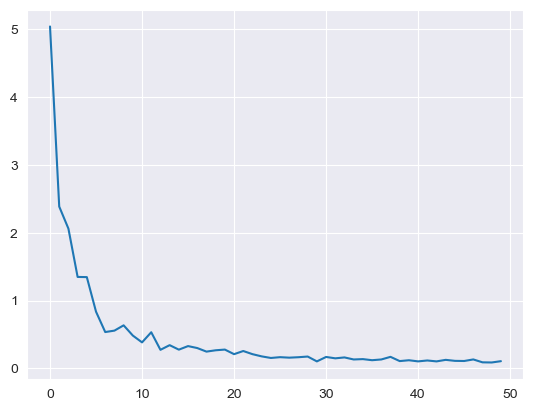

In [110]:
class Question1c:
    k = Question1b.k
    variances = np.var(Question1b.means, axis=1)
    
    plt.plot(variances)

In [111]:
grader.check("Question 1c")

Question 1c results: All test cases passed!

Does the variance decrease as we increase the number of samples ($N$)? Why?

* yes

# 2 (7 points)
## Confidence Interval
In this exercise, we work on confidence interval calculation using the bootstrap technique.
Let's generate $N$ samples from Gaussian distribution:

<Axes: ylabel='Count'>

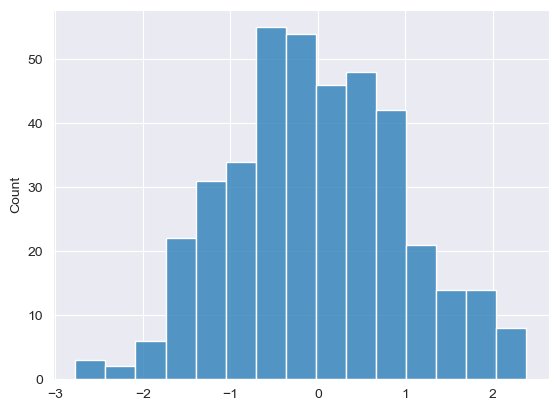

In [150]:
mu = 0.0
sigma = 1.0
N = 400

np.random.seed(0)
X = stats.norm(loc=mu, scale=sigma)
x = X.rvs(N)
sns.histplot(x)

# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

### 2a (3 points)

As discussed in the previous lecture, we can use the bootstrap technique to find the confidence interval. In this exercise, we are going to estimate the confidence interval using bootstrap technique. For this we use the bootstrap function from the scipy.stats module.

Given $N$ samples and a confidence level of 0.95, the scipy bootstrap function does the following steps to calculate the confidence interval:
1. Randomly select $N$ samples with replacement from the given samples. Sampling with replacement allows us to generate different batches of samples with size $N$ from a single set.
2. Calculate the mean of the $N$ selected samples.
3. Repeat steps 1 and 2 for a total of $k$ times and store the means in a vector.
4. Calculate the 2.5th and 97.5th percentiles of the means vector and store them in the 'CI' variable.

This function calculates the confidence interval of a given statistic, such as mean or median. Let's use the scipy bootstrap function to estimate the confidence interval in our sample distribution `x` above and store the function output in `bootstrap_ci` variable. Note that we are estimating the 'mean' and using the 'percentile' method.
Please visit [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html) website for further information.

In [151]:
import numpy as np


class Question2a:
    k = 50
    confidence_level = 0.95
    np.random.seed(0)
    
    bootstrap_ci = stats.bootstrap(
        (x,),
        np.mean,
        confidence_level=confidence_level,
        n_resamples=k,
    )
    
    CI_scipy = [bootstrap_ci.confidence_interval[0],
        bootstrap_ci.confidence_interval[1]]
    print("The {} confidence interval for N={} is: [{:.3f}, {:.3f}].".format(
        confidence_level, N, CI_scipy[0], CI_scipy[1]))

The 0.95 confidence interval for N=400 is: [-0.134, 0.077].


In [152]:
grader.check("Question 2a")

Question 2a results: All test cases passed!

### 2b (1 points)
Compute the confidence interval for $N = 4000$ (instead of 400) and store the function output in 'bootstrap_ci_4000'.

The 0.95 confidence interval for N=4000 is: [-0.057, 0.002].


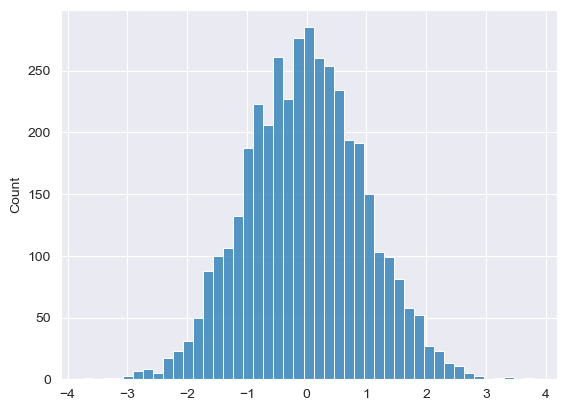

In [153]:

import numpy as np


class Question2b:
    mu = 0.0
    sigma = 1.0
    N = 4000  # previously 400
    
    np.random.seed(0)
    X = stats.norm(loc=mu, scale=sigma)
    x = X.rvs(N)
    sns.histplot(x)
    
    k = 50
    confidence_level = 0.95
    
    bootstrap_ci_4000 = stats.bootstrap(
        (x,),
        np.mean,
        confidence_level=confidence_level,
        n_resamples=k,
    )
    
    CI_scipy_4000 = [bootstrap_ci_4000.confidence_interval[0],
        bootstrap_ci_4000.confidence_interval[1]]
    print("The {} confidence interval for N={} is: [{:.3f}, {:.3f}].".format(
        confidence_level,
        N, CI_scipy_4000[0],
        CI_scipy_4000[1]))

In [154]:
grader.check("Question 2b")

Question 2b results: All test cases passed!

Does the confidencence interval shrink by increasing the number of samples ($N$)? Why?

* It shrinks because more samples result in a smaller standard error

### 2c (3 points)

In this exercise, we will implement the bootstrap technique from scratch to estimate the confidence interval of a given set of samples. Please implement the steps explained in question 2a. This will allow us to compare our implementation with the one provided by scipy.stats module. Please store the estimated confidence interval in the 'CI' variable.

In [160]:
class Question2c:
    N = 4000  # previously 400
    
    np.random.seed(0)
    X = stats.norm(loc=mu, scale=sigma)
    x = X.rvs(N)
    
    k = 50
    confidence_level = 0.95
    means = np.zeros([k])
    
    for i in range(k):
        xx = X.rvs(N)
        means[i] = xx.mean()
    
    CI = [np.percentile(means, 2.5), np.percentile(means, 97.5)]
    
    print("The {} confidence interval for N={} is: [{:.3f}, {:.3f}].".format(
        confidence_level, N, CI[0], CI[1]))

The 0.95 confidence interval for N=4000 is: [-0.023, 0.033].


In [161]:
grader.check("Question 2c")

Question 2c results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [162]:
grader.check_all()

Question 1a results: All test cases passed!

Question 1b results: All test cases passed!

Question 1c results: All test cases passed!

Question 2a results: All test cases passed!

Question 2b results: All test cases passed!

Question 2c results: All test cases passed!